# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

The original dataset contains 15,000 rows and 8 columns. The following validation and cleaning steps were performed on each column to ensure data quality and accuracy:

1. **'week' Column**:
   - **Data Type**: Integer (originally), String (after conversion)
   - **Description**: Contains 6 unique values ranging from 1 to 6. 
   - **Action Taken**: The data type for the 'week' column was changed to string. This conversion was made to ensure that 'week' values could be used effectively in charts and legends for clearer data visualization.
   <br><br>

2. **'sales_method' Column**:
   - **Data Type**: String
   - **Description**: Represents the sales methods with values such as Call, Email, and Email+Call.
   - **Action Taken**: Standardized the values by correcting inconsistencies:
     - Changed "em + call" to "Email + Call"
     - Changed "email" to "Email"
   - **Result**: Reduced the column count from 5 to 3 unique sales methods.
<br><br>
3. **'customer_id' Column**:
   - **Data Type**: String
   - **Description**: A character variable with unique identifiers for each customer.
   - **Action Taken**: Verified that all values are unique and that there are no missing values. No further cleaning was needed.
<br><br>
4. **'nb_sold' Column**:
   - **Data Type**: Integer
   - **Description**: Represents the number of items sold, with 10 unique values ranging from 7 to 16.
   - **Action Taken**: Verified that the range of values is consistent with the provided description. No missing values or additional cleaning were required.
<br><br>
5. **'revenue' Column**:
   - **Data Type**: Float
   - **Description**: Contains numeric values representing revenue. The column has 1,074 missing values, which represents approximately 7% of the total values. The revenue distribution is right-skewed, indicating a concentration of data around lower revenue values with a long tail extending towards higher values.
   - **Action Taken**: Instead of removing rows with missing values, which would result in the loss of around 7% of the dataset, imputation was performed. Due to the right-skewed distribution, missing values were imputed using the median revenue specific to each sales method. This approach ensures that the imputation reflects the variability within each sales approach and preserves the integrity of the data while addressing the distribution skew.
<br><br>
6. **'years_as_customer' Column**:
   - **Data Type**: Integer
   - **Description**: Numeric values indicating the number of years a customer has been with the company. Maximum value observed is 63 years, although the company has been operational for 40 years. Additionally, a second outlier was found at 47 years.
   - **Action Taken**: Identified and removed outliers (47 and 63 years) that exceed the company's operational history. This adjustment ensures that the data aligns with the realistic operational timeline.
<br><br>
7. **'nb_site_visits' Column**:
   - **Data Type**: Integer
   - **Description**: Represents the number of site visits, with numeric values and no missing data.
   - **Action Taken**: Verified that the data matches the description. No additional cleaning was required.
<br><br>
8. **'state' Column**:
   - **Data Type**: String
   - **Description**: Represents the state with 50 possible values, corresponding to the 50 U.S. states.
   - **Action Taken**: Verified that all 50 states are represented, with no missing values. No further cleaning was necessary.
<br><br>

**Summary**:

After completing the necessary data cleaning and validation steps, the dataset is now ready for analysis. The cleaned dataset contains 14,998 rows and 8 columns. Key actions performed include:

- **Addressing missing values**: Imputed missing values in the 'revenue' column using median revenue values for each 'sales_method' sub-group. This approach was chosen to maintain data completeness and accuracy while accounting for the right-skewed distribution of revenue data.
- **Standardizing inconsistent entries**: Corrected inconsistent values in 'sales_method' column to unify the data format.
- **Removing outliers**: Identified and removed outliers in 'years_as_customer' columns to maintain data accuracy and relevance.

These steps have enhanced the dataset’s quality, ensuring that it is accurate and reliable for further analysis and decision-making.

In [2]:
# Import necessary libraries and load the data for initial examination
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sales = pd.read_csv('product_sales.csv')
sales.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [3]:
# Check the data types of each column and the presence of any null values
sales.info()
revenue_nulls = sales['revenue'].isna().sum()
print()
print(f"There are {revenue_nulls} null values in the 'revenue' column.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB

There are 1074 null values in the 'revenue' column.


In [4]:
# Converting the 'week' column to string type
sales['week'] = sales['week'].astype(str)
sales['week'].dtype

dtype('O')

In [5]:
# Generate descriptive statistics for the numerical columns in the dataset
sales.describe()

,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,13926.000000,15000.000000,15000.000000
mean,10.084667,93.934943,4.965933,24.990867
std,1.812213,47.435312,5.044952,3.500914
min,7.000000,32.540000,0.000000,12.000000
25%,9.000000,52.470000,1.000000,23.000000
50%,10.000000,89.500000,3.000000,25.000000
75%,11.000000,107.327500,7.000000,27.000000
max,16.000000,238.320000,63.000000,41.000000


In [6]:
# Identify and display any duplicate rows in the dataset, including all instances of duplicates
duplicates = sales[sales.duplicated(keep=False)]
duplicates

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state


In [7]:
# Checking the number of unique values in key columns
print('Week unique values: ', sales['week'].nunique())
print('Sales methods unique values: ', sales['sales_method'].nunique())
print('States unique values: ', sales['state'].nunique())
print('Number of sold items unique values: ', sales['nb_sold'].nunique())
print()

# Displaying the actual unique values in each column
print(sales['week'].unique())
print(sales['sales_method'].unique())
print(sales['state'].unique())

Week unique values:  6
Sales methods unique values:  5
States unique values:  50
Number of sold items unique values:  10

['2' '6' '5' '4' '3' '1']
['Email' 'Email + Call' 'Call' 'em + call' 'email']
['Arizona' 'Kansas' 'Wisconsin' 'Indiana' 'Illinois' 'Mississippi'
 'Georgia' 'Oklahoma' 'Massachusetts' 'Missouri' 'Texas' 'New York'
 'Maryland' 'California' 'Tennessee' 'Pennsylvania' 'North Dakota'
 'Florida' 'Michigan' 'North Carolina' 'Hawaii' 'Colorado' 'Louisiana'
 'Virginia' 'New Mexico' 'Arkansas' 'Alaska' 'Oregon' 'New Hampshire'
 'Ohio' 'New Jersey' 'Connecticut' 'Iowa' 'Montana' 'Washington'
 'Kentucky' 'Alabama' 'Nebraska' 'South Carolina' 'Minnesota'
 'South Dakota' 'Delaware' 'Maine' 'Utah' 'West Virginia' 'Vermont'
 'Rhode Island' 'Nevada' 'Idaho' 'Wyoming']


In [8]:
sales.loc[sales.sales_method=='em + call', 'sales_method'] = 'Email + Call'
sales.loc[sales.sales_method=='email', 'sales_method'] = 'Email'
sales['sales_method'].unique()

array(['Email', 'Email + Call', 'Call'], dtype=object)

In [9]:
# Finding outliers
outliers = sales[sales['years_as_customer'] > 40]
outliers

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


In [10]:
# Removing outliers by filtering out customers with more than 40 years as a customer
sales_cleaned = sales[sales['years_as_customer'] <= 40]

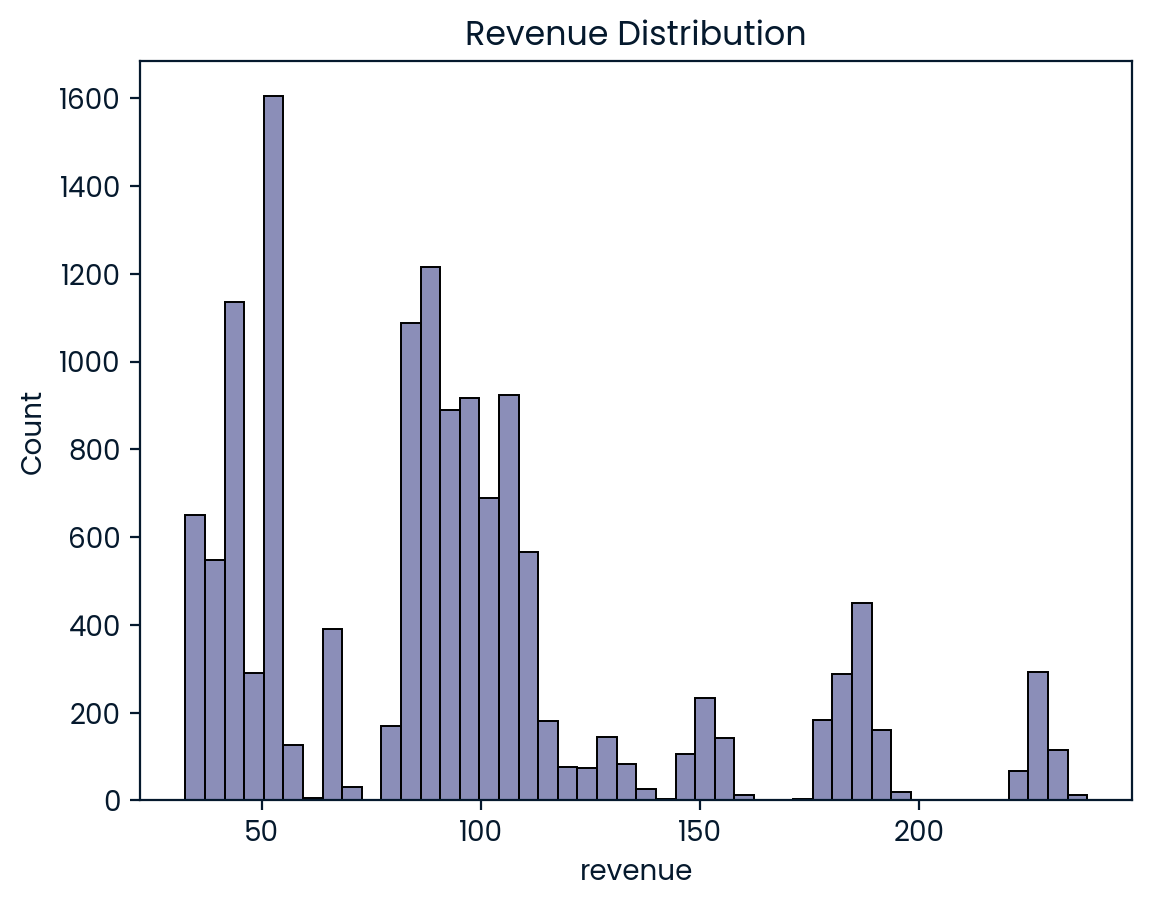

In [11]:
# Checking the distribution of revenue
sns.histplot(data=sales, x='revenue')
plt.title("Revenue Distribution")
plt.show()

In [12]:
# Calculate median revenue for each sales method
median_revenue_by_method = sales_cleaned.groupby('sales_method')['revenue'].median()
median_revenue_by_method

sales_method
Call             49.05
Email            95.58
Email + Call    184.74
Name: revenue, dtype: float64

In [22]:
# Function to impute revenue based on sales method
def impute_revenue(row):
    if pd.isna(row['revenue']):
        method = row['sales_method']
        imputed_value = median_revenue_by_method.get(method, sales_cleaned['revenue'].median())
        return imputed_value
    return row['revenue']

# Apply the imputation function
sales_cleaned['revenue'] = sales_cleaned.apply(impute_revenue, axis=1)

# Check after applying imputation
print(sales_cleaned.isna().sum())

# Displaying descriptive statistics for all columns after removing outliers and dealing with null values
sales_cleaned.describe(include='all').fillna('')

week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64


,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
count,14998,14998,14998,14998.0,14998.0,14998.0,14998.0,14998
unique,6,3,14998,,,,,50
top,1,Email,2e72d641-95ac-497b-bbf8-4861764a7097,,,,,California
freq,3721,7465,1,,,,,1870
mean,,,,10.084678,95.568619,4.959261,24.990799,
std,,,,1.812334,47.9872,5.011237,3.5011,
min,,,,7.0,32.54,0.0,12.0,
25%,,,,9.0,52.65,1.0,23.0,
50%,,,,10.0,90.95,3.0,25.0,
75%,,,,11.0,107.75,7.0,27.0,


# Exploratory Analysis

# Customer Distribution by Sales Method
## Objective: "How many customers were engaged by each sales approach?"

This section examines the distribution of customers across three different sales methods used to promote our new line of office stationery: Email, Call, and a combination of both Email and Call. The goal is to determine the effectiveness of each method in reaching customers.

<b>Sales method distribution:</b>

<ul>
    <li>Email: 7,465 customers</li>
    <li>Call: 4,961 customers</li>
    <li>Email + Call: 2,572 customers</li>
</ul>
<b>Total customers engaged:</b> 14,998<br>
<br>

Approximately 50% of all customers were reached through the Email method, making it the most efficient approach for broad outreach with minimal effort. Email is clearly the preferred strategy for initial contact due to its effectiveness in engaging a large audience.

The Call method reached about 33% of customers. While Calls offer a personal touch that can be valuable for high-priority interactions, they are more resource-intensive and reach fewer customers.

The combination of Email and Call engaged around 17% of customers. Although this method provides a thorough approach, it is less efficient for reaching a broad audience due to the increased effort required.


Email clearly outperformed the other methods in customer engagement, likely due to its cost-effectiveness and ease of use. Phone calls were the second most chosen method. The least popular method was a combination of email and phone calls.

sales_method
Call            4961
Email           7465
Email + Call    2572
Name: customer_id, dtype: int64


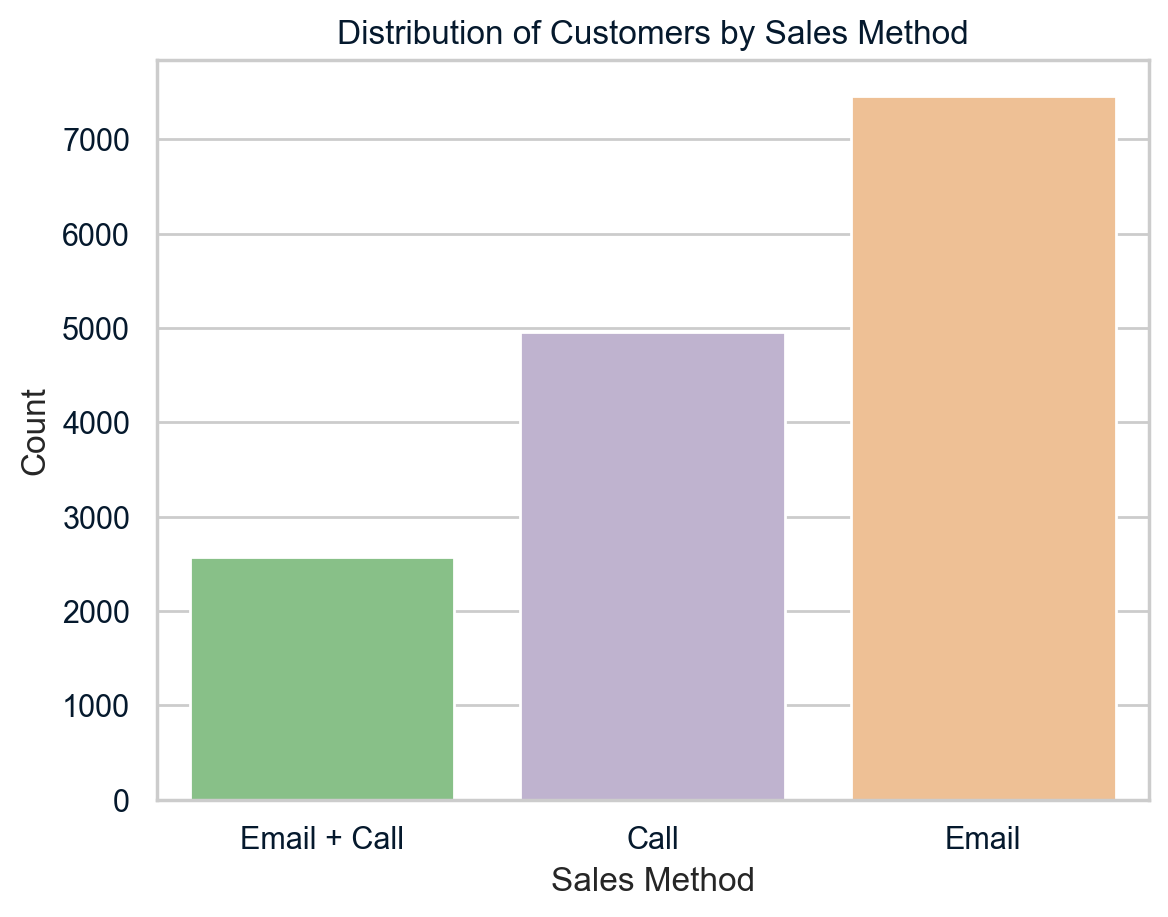

In [14]:
# Count the number of customers for each sales method
customer_counts = sales_cleaned.groupby('sales_method')['customer_id'].count()
print(customer_counts)

# Create the count plot
sns.set_style('whitegrid')
sns.set_context('notebook')
order = ['Email + Call', 'Call', 'Email']
sns.countplot(data=sales_cleaned, x='sales_method', palette='Accent', order=order)
plt.title('Distribution of Customers by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Count')
plt.show()

# Revenue Distribution Analysis

## Objective: "What does the spread of the revenue look like overall? And for each method?"

Here, we analyze the spread of revenue across all sales methods. We will provide statistical summaries and visualizations to illustrate the overall revenue distribution as well as the distribution specific to each sales method.

In [15]:
revenue_by_method = sales_cleaned.groupby('sales_method')['revenue']
revenue_stats_by_method = revenue_by_method.describe()
revenue_stats_by_method

,count,mean,std,min,25%,50%,75%,max
sales_method,,,,,,,,
Call,4961.0,47.649883,8.456520,32.54,41.6300,49.05,52.590,71.36
Email,7465.0,97.014887,10.802488,78.83,88.3900,95.58,104.460,148.97
Email + Call,2572.0,183.798970,27.040536,122.11,176.4375,184.74,189.535,238.32


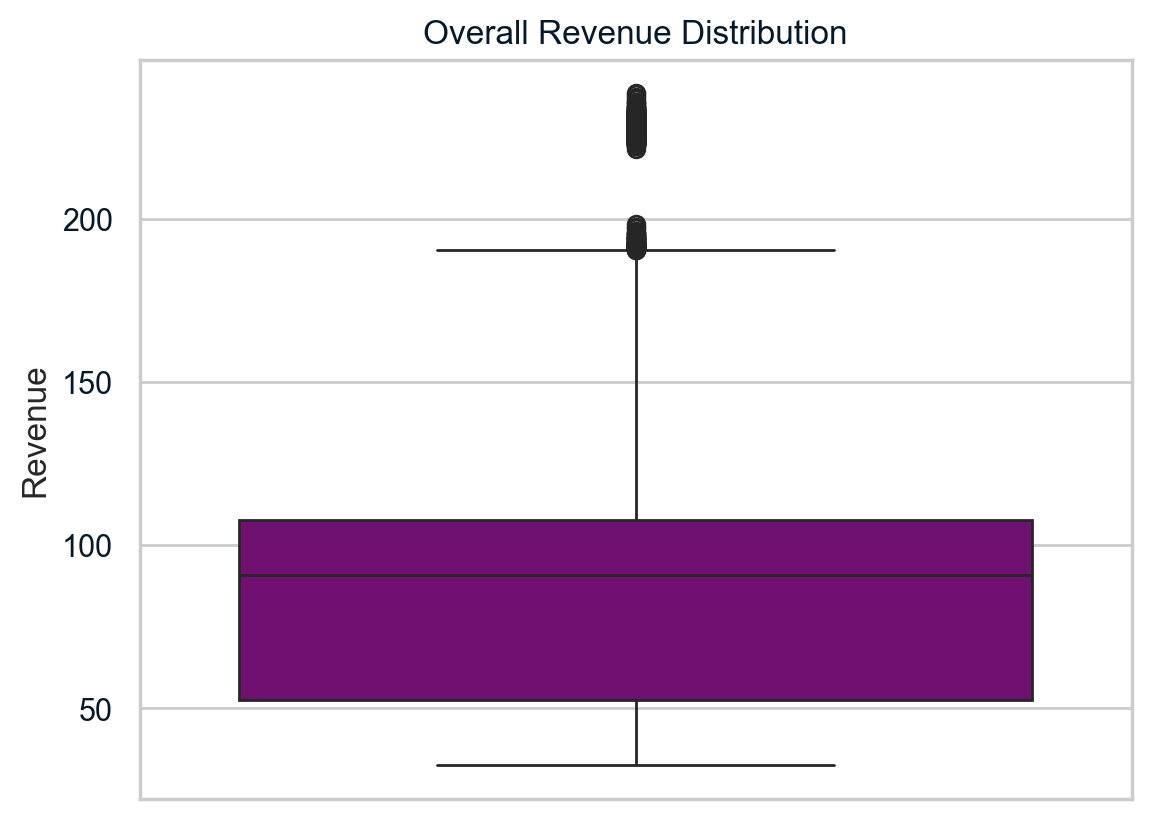

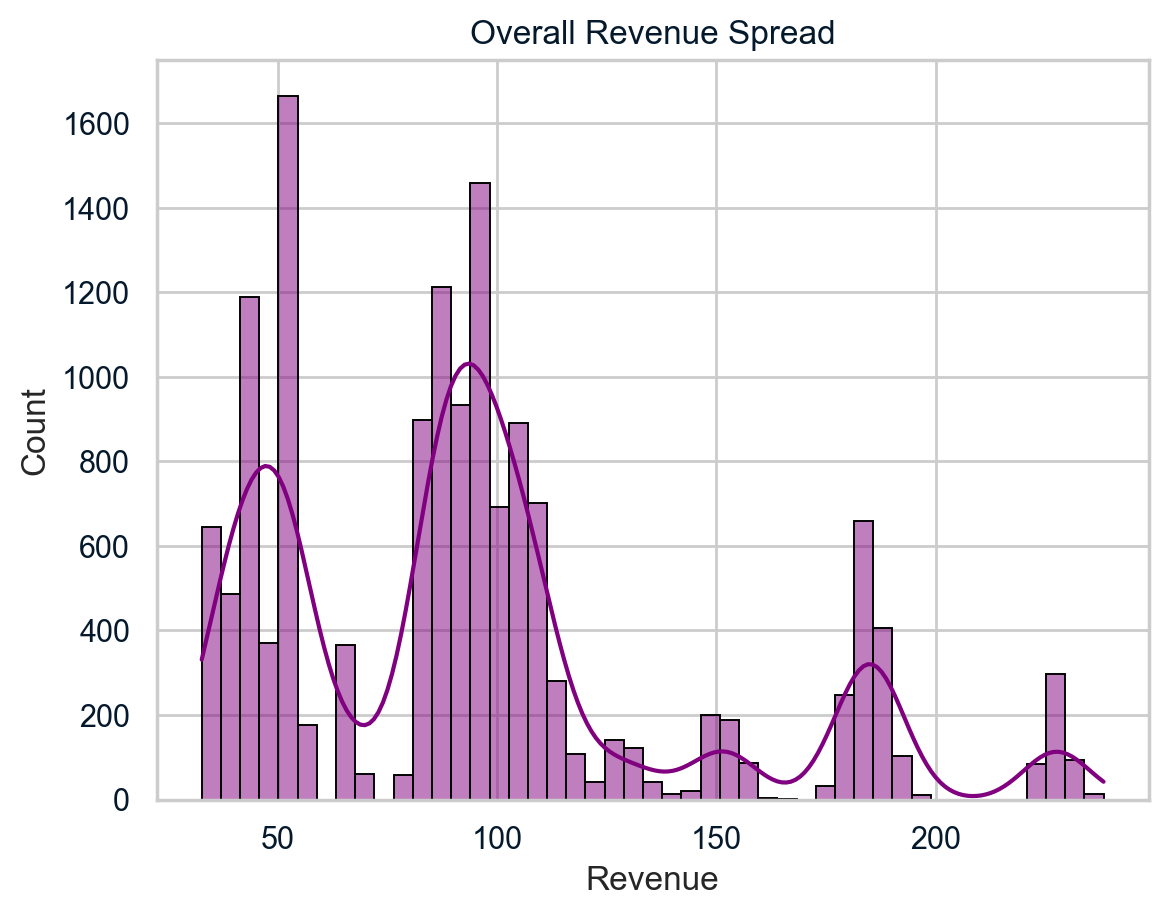

In [16]:
# Plot overall revenue distribution
sns.set_style('whitegrid')
sns.set_context('notebook')

sns.boxplot(y=sales_cleaned['revenue'], color='purple')
plt.title('Overall Revenue Distribution')
plt.ylabel('Revenue')
plt.show()
sns.histplot(data=sales_cleaned['revenue'], color='purple', edgecolor='black', kde=True)
plt.title('Overall Revenue Spread')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.show()

The overall mean revenue is approximately \$95, while the median is abot \$91. The revenue range spans from a minimum of around \$32.54 to a maximum of about \$238.

The revenue distribution, illustrated in the second graph above, is skewed to the right and exhibits a non-normal pattern with five distinct peaks.

<b>Peak insights:</b> The peaks highlight where sales are concentrated. Significant activity is observed around \$50 and \$90, indicating these may be optimal price points or the most popular products. The third notable peak at approximately \$185, though smaller in magnitude with approximately 300 counts compared to the higher peaks, still indicates that this revenue level attracts a notable amount of customer interest and could represent another relevant pricing or product segment to consider.


Text(0, 0.5, 'Sales method')

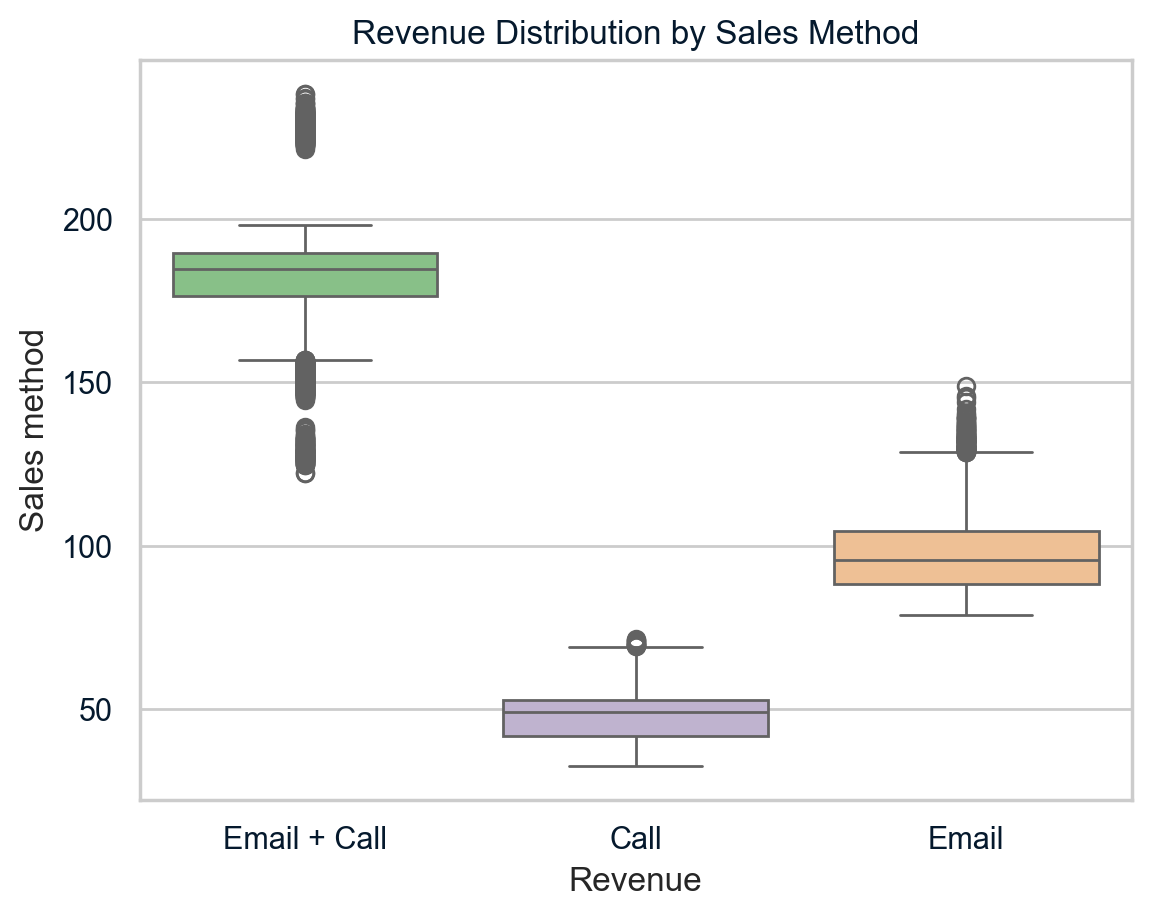

In [17]:
# Plot revenue distribution for each method
sns.set_style('whitegrid')
sns.set_context('notebook')

sns.boxplot(y=sales_cleaned['revenue'], x=sales_cleaned['sales_method'], palette='Accent', order=order)
plt.title('Revenue Distribution by Sales Method')
plt.xlabel('Revenue')
plt.ylabel('Sales method')

In [18]:
# Calculating IQR for each sales method
iqr_df = sales_cleaned.groupby('sales_method')['revenue'].apply(lambda x: x.quantile(0.75) - x.quantile(0.25))
print('IQR for each sales method:')
print(iqr_df)

IQR for each sales method:
sales_method
Call            10.9600
Email           16.0700
Email + Call    13.0975
Name: revenue, dtype: float64


sales_method
Call            236391.07
Email           724216.13
Email + Call    472730.95
Name: revenue, dtype: float64


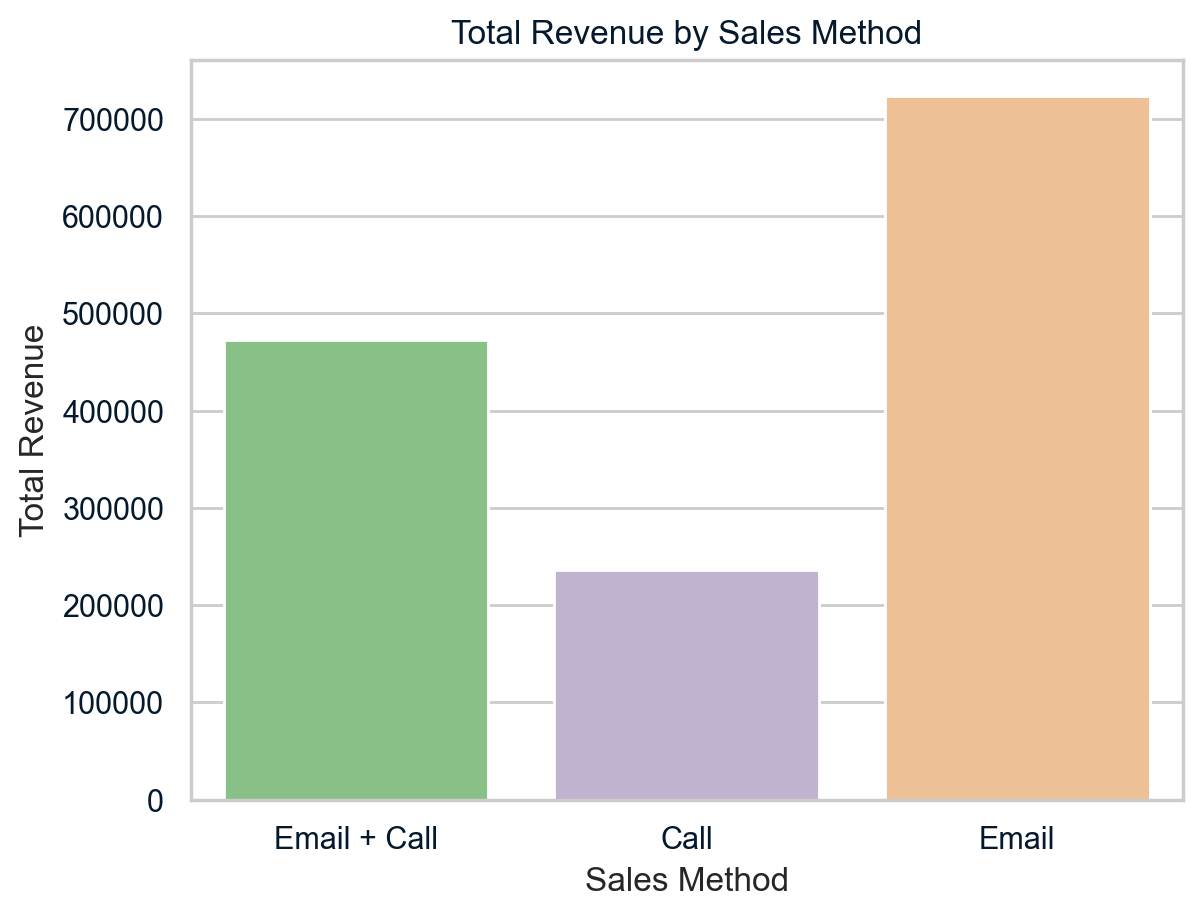

In [19]:
revenue_sum = sales_cleaned.groupby('sales_method')['revenue'].sum()
print(revenue_sum)

sns.set_style('whitegrid')
sns.set_context('notebook')

sns.set_style('whitegrid')
sns.set_context('notebook')
order = ['Email + Call', 'Call', 'Email']

sns.barplot(x=revenue_sum.index, y=revenue_sum.values, palette='Accent', order=order)
plt.title('Total Revenue by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Total Revenue')
plt.show()

The revenue generated through each sales method varies significanty, as indicated by the descriptive statistics. The table below presents a summary of the revenue spread by sales method.


| Sales Method  | Count | Mean     | Std       | Min   | 25%   | 50%   | 75%   | Max    | Total Revenue |
|---------------|-------|----------|-----------|-------|-------|-------|-------|--------|---------------|
| Call          | 4961  | 47.65    | 8.46      | 32.54 | 41.63 | 49.05 | 52.59 | 71.36  | 236391.07     |
| Email         | 7465  | 97.01    | 10.80     | 78.83 | 88.39 | 95.58 | 104.46| 148.97 | 724216.13     |
| Email + Call  | 2572  | 183.80   | 27.04     | 122.11| 176.44| 184.74| 189.54| 238.32 | 472730.95     |



<b>Call:</b> This method shows the lowest average revenue at \$47.65. It also has the narrowest revenue range among the methods, with an interquartile range (IQR) of \$11, indicating a smaller spread in revenue outcomes.

<b>Email:</b> The average revenue of \$97.01 from the Email method is notably higher than that of the Call method but still significantly lower than the Email + Call method. Its IQR for Email is \$16, showing a broader spread in revenue compared to Call.

<b>Email + Call:</b> This method achieves the highest average revenue at \$183.80. Despite an IQR of $13, which might not appear very large, the revenue distribution reveals numerous outliers on both the upper and lower ends. This extensive spread suggests significant variability and potential for higher revenue generation with this combined approach, highlighting its effectiveness despite the IQR.

Overall, the Email method generates the most revenue, followed by Email + Call, likely due to the higher utilization of Email. In contrast, the Call method lags behind, which may be attributed to its higher implementation costs and relatively lower revenue yield.

# Revenue Trends Over Time by Sales Method

## Objective: "Was there any difference in revenue over time for each of the methods?"

In this section, we examine how revenue trends vary over time for each sales method. We will present time series data to identify any significant differences or patterns in revenue generation over the observed periods.

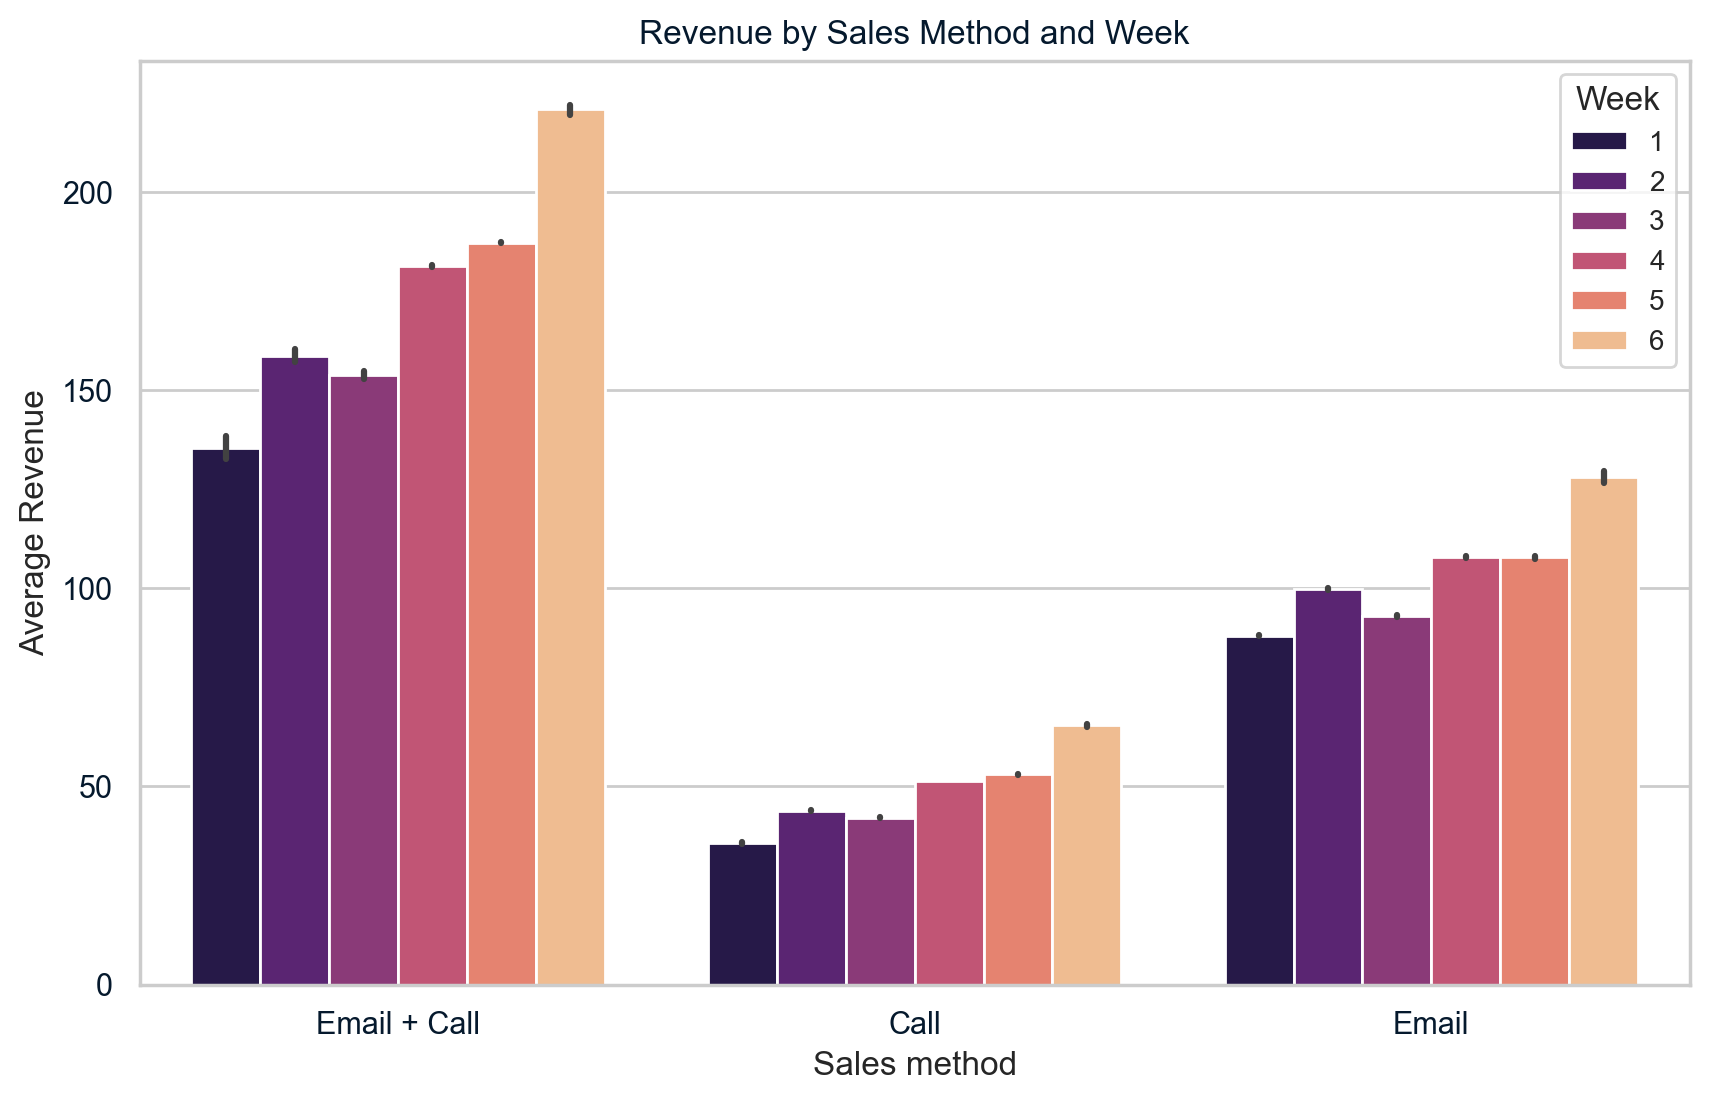

week,1,2,3,4,5,6
sales_method,,,,,,
Call,35.675567,43.805615,42.034335,51.349173,53.000920,65.363772
Email,88.039137,99.806444,92.970817,107.825740,107.817295,128.101675
Email + Call,135.310203,158.668450,153.768914,181.313293,187.186607,220.758782


In [20]:
# Preparing data for the bar plot
week_order = ['1', '2', '3', '4', '5', '6']

# Plot showing revenue for each sales method, broken down by week
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_cleaned, x='sales_method', y='revenue', hue='week', order=order, hue_order=week_order, palette='magma')
plt.title('Revenue by Sales Method and Week')
plt.xlabel('Sales method')
plt.ylabel('Average Revenue')
plt.legend(title='Week', fontsize='small', title_fontsize='medium')
plt.show()

revenue_summary = sales_cleaned.groupby(['sales_method', 'week'])['revenue'].mean().reset_index()
revenue_pivot = revenue_summary.pivot(index='sales_method', columns='week', values='revenue')

revenue_pivot

Across all sales methods, there is a clear upward trend in revenue over time, with each method peaking in the final week (Week 6). Throughout the observed period, each method experienced slightly lower revenue in Week 3 compared to Week 2.

Each approach showed an increase in revenue, reflecting a general growth pattern throughout the observation period.

<ul>
    <li><b>Call:</b><br>
        <ul>
            <li><b>Initial Revenue:</b> $35.68 in Week 1</li>
            <li><b>Final Revenue:</b> $65.36 in Week 6</li>
            <li><b>Percentage Increase:</b> 83%</li>
            <li><b>Trend:</b><br> The Call method showed a steady increase in revenue throughout the period. Despite starting from a lower revenue base, it achieved a notable increase of $29.68, reflecting a significant growth rate.</li>
        </ul>
    </li><br>
    <li><b>Email:</b><br>
        <ul>
            <li><b>Initial Revenue:</b> $88.04 in Week 1</li>
            <li><b>Final Revenue:</b> $128.10 in Week 6</li>
            <li><b>Percentage Increase:</b> 46%</li>
            <li><b>Trend:</b><br> The Email method exhibited a strong upward trend, with revenue rising by $40.06 over the period. This growth indicates a substantial improvement in revenue performance compared to the Call method.</li>
        </ul>
    </li><br>
    <li><b>Email + Call:</b><br>
        <ul>
            <li><b>Initial Revenue:</b> $135.31 in Week 1</li>
            <li><b>Final Revenue:</b> $220.76 in Week 6</li>
            <li><b>Percentage Increase:</b> 63%</li>
            <li><b>Trend:</b><br> The Email + Call method experienced the highest growth, with a significant increase of $85.45. This method demonstrated the most considerable revenue growth and the highest final revenue, underscoring its effectiveness and potential for generating revenue.</li>
        </ul>
    </li>
</ul>


These trends underscore the varying degrees of effectiveness for each method. The Email + Call method, in particular, stands out with the largest increase in average revenue.

Based on these findings, it is recommended that the company continue to focus on the Email + Call method. This approach not only achieved the highest revenue but also demonstrated substantial potential for further growth. The consistent positive trend suggests that it offers a favorable return on investment and should be prioritized for continued revenue generation.

# Business Metric to Monitor

**Metric Name:** Average Revenue by Sales Method

**Description:**
This metric tracks the average revenue generated per customer for each sales method (Email, Call, and Email + Call). It is calculated by dividing the total revenue generated by the number of customers engaged through each method. This metric provides a clear understanding of the effectiveness of each sales approach in generating revenue, allowing for continual monitoring and optimization of sales strategies.

**Formula:**
Revenue per Customer = Total Revenue / Number of Customers

**Purpose:**

* Evaluate sales method efficiency: This metric allows the business to directly compare the revenue generated per customer by each sales method. By understanding which method yields the highest revenue per customer, the company can prioritize and optimize its sales strategies accordingly.

* Resource allocation: The metric provides insights into which sales methods are most efficient, guiding the allocation of resources such as budget, time, and personnel toward the most productive approaches.

* Performance tracking: Tracking this metric over time enables the business to assess the impact of strategic changes, marketing campaigns, or shifts in customer engagement on overall revenue performance. It serves as a baseline measure to monitor progress and make data-driven decisions.

**Baseline Measure:**

Based on the existing data, the following baseline values have been calculated for the Revenue per Customer by each sales method:

1)  **Email:**
 <ul>
    <li>Total Revenue: $724,216</li>
<li>Number of Customers: 7,465</li>
<li>Average Revenue: $97.01</li>
</ul>

2) **Call:**

* Total Revenue: \$236,391
* Number of Customers: 4,961
* Average Revenue: \$47.65

3) **Email + Call:**

* Total Revenue: \$472,731
* Number of Customers: 2,572
* Average Revenue: \$183.80

These baseline figures offer a snapshot of the current effectiveness of each sales method, providing a foundation for future comparisons and strategic adjustments. By regularly monitoring this metric, the company can measure success in solving the problem of optimizing sales methods and driving revenue growth.

# Final Summary and Recommendations
## Summary:
The analysis of the sales data reveals important insights into the effectiveness of different sales methods used for the new product line of office stationery:
<ul>
    <li><b>Customer distribution:</b></li> 
        The Email method reached the most customers, followed by Call and then Email + Call. Despite its broad reach, Email generated lower revenue per customer compared to the more personalized methods.
    <br><br>
    <li><b>Revenue distribution:</b></li> 
    The Email + Call method generated the highest average revenue per customer, suggesting that a combination of initial email outreach and follow-up calls is most effective for maximizing revenue.
    <br><br>
    <li><b>Revenue trends:</b></li> 
    All sales methods showed positive revenue trends over the six-week period, with Email + Call demonstrating the highest growth in revenue.
    </ul>
    
## Recommendations:
1. **Focus on the Email + Call method:**

* Given its higher revenue per customer and substantial revenue growth, prioritize the Email + Call approach for future product launches. This method combines the efficiency of email with the personalized touch of a follow-up call, leading to greater revenue generation.

2. **Enhance resource allocation:**

* Allocate more resources to the Email + Call method to optimize its effectiveness. This may include investing in additional training for sales teams or increasing the budget for combined email and phone outreach efforts.

3. **Leverage Email for broad outreach:**

* Continue using the Email method for initial contact to engage a large number of customers efficiently. This approach is cost-effective and can be used to generate initial interest before following up with more personalized methods.

4. **Consideration of discontinuing the Call method:**

* The Call method is resource-intensive, requiring an average of 30 minutes per customer, and has shown lower revenue performance compared to other methods. Given these factors, it may be beneficial to phase out the Call method in favor of strategies that offer higher returns. Redirecting resources to more effective approaches could optimize overall sales performance.

5. **Monitor and adjust based on metric:**

* Regularly monitor the Average Revenue by Sales Method metric to track the effectiveness of different sales strategies. Use this data to make informed decisions about refining sales tactics and improving overall performance.

6. **Data collection improvement:**

* The revenue column has 1,074 missing entries, which may compromise the accuracy of our revenue analysis. It is essential to investigate and address the underlying causes of these missing values. By resolving this data gap, we can obtain a clearer and more accurate picture of sales performance, leading to better-informed decision-making.

7. **Explore additional data insights:**

* Further analyze customer feedback and engagement data to identify potential areas for improvement in sales methods. This could include investigating customer preferences, optimizing email content, or adjusting call scripts.

8. **Implement a sales performance dashboard:**

* Develop a comprehensive dashboard to monitor key sales metrics such as Total Revenue, Average Revenue by Sales Method, Customer Engagement Rates, and Conversion Rate. The dashboard should provide real-time insights and facilitate easy tracking of trends over time. This will enable the team to make data-driven decisions quickly, optimize sales strategies, and respond proactively to any emerging issues.

By implementing these recommendations, Pens and Printers can enhance its sales strategies, improve customer engagement, and maximize revenue for new product lines. The insights derived from the data will support more effective decision-making and strategic planning for future sales efforts.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation